# <span style='color:green'> Python visualization 101 </span>

## <span style='color:blue'> 1. Matplotlib </span>

Matplotlib is a matlab-style base visualization library in Python, originally created by John Hunter (http://matplotlib.org/). It is the foundation for learning many other visualization tools.

By convention, we import the module of matplotlib.pyplot as plt.

The method _plt.show()_ is used to display the plot in a new window. But to view plots in Notebook, we need to add a special line of code as seen in below. 

To save a plot to file, we can use _fig.savefig("filename.format", dpi=100)_. dpi means 'dots per inch' for resolution, and its default value is 100.

As a note, the default values in Python can be find by _from matplotlib import rcParams as default\_dict_, which returns a _dict_ storing the values. For example, we can find that the default file format for saving a figure is 'png'. 

In [1]:
from matplotlib import rcParams as default_dict
default_dict['savefig.format']

'png'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# generate random Gaussian values
from random import seed
from random import gauss
# seed random number generator
seed(1)
# generate some Gaussian values

x = sorted([gauss(0,1) * 10 for _ in range(10)])
y = [n**2 for n in x]

In [4]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

xlab = 'values'
ylab = 'squared'
mytitle = 'This is 101'

### 1.1. Single plot

#### 1.1.1. Use _plt.plot_
This is the basic way to plot in Python. 

We can see that there is a line of message showing the passed text and its location. This can be suppressed by suffixing a ';' in the last line or adding _plt.show()_ in the end.

Text(0.5, 1.0, 'This is 101')

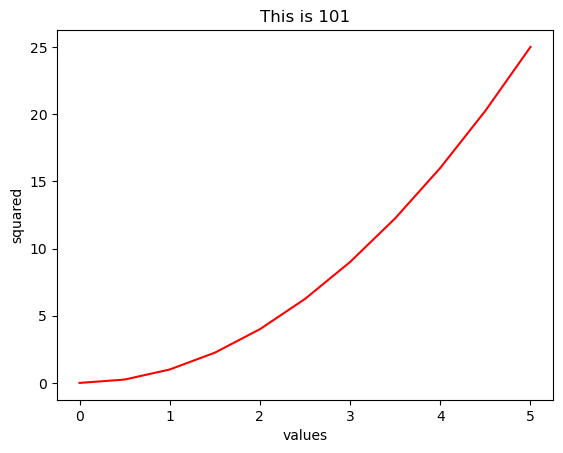

In [5]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(mytitle)

#### 1.1.2. Use _plt.figure()_

We first instantiate an object of _figure_ and add one or more _axes_ to it. 

In this context, an _axes_ is actually a plot (maybe because we define a plot by relative positions and sizes as \[left, bottom, width, height\], which are for x/y-axis). A _figure_ object can contain multiple _axes_ objects. 

Obviously, this method apply to created multiple plots as well. The axes can be generated sequentially or by defining names anywhere (see next part for an example).

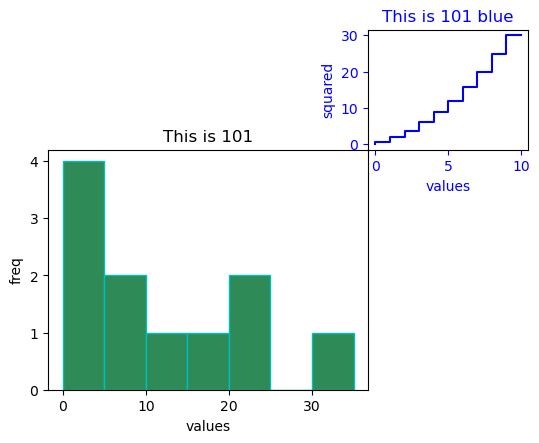

In [6]:
fig = plt.figure()

axes = fig.add_axes([0., 0., 0.5, 0.5]) # left, bottom, width, height (range 0 to 1)

axes.hist(x+y, bins=range(0,40,5), color='seagreen', edgecolor = "c")

axes.set_xlabel(xlab)
axes.set_ylabel('freq')
axes.set_title(mytitle)

axes = fig.add_axes([0.5, 0.5, 0.25, 0.25]) # left, bottom, width, height (range 0 to 1)

axes.step(x+y, 'b')
axes.set_xlabel(xlab)
axes.set_ylabel(ylab)
axes.set_title(f'{mytitle} blue', color='b')

axes.xaxis.label.set_color('b')
axes.yaxis.label.set_color('b')
axes.tick_params(axis='both', colors='b')

plt.show()

### 1.2. Multiple plots

#### 1.2.1. Use _subplot()_
We can first define a matrix of deployment by (nrows, ncols, plot_index-1-based). Then add plots one by one.

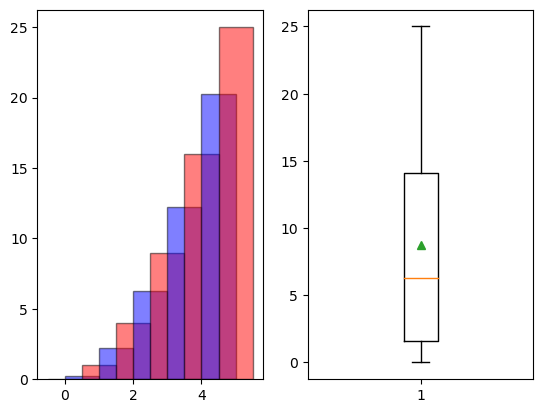

In [7]:
plt.subplot(1,2,1)
plt.bar(x, y, color=['r', 'b']*5 + ['r'],  edgecolor='k', align="center", width=1, alpha=0.5)
plt.subplot(1,2,2)
plt.boxplot(y, vert=True, patch_artist=False, showmeans=True, meanline=False)
plt.show()

#### 1.2.2. Use _plt.figure()_ and _add_axes()_
As mentioned in 1.1.2, this is flexible in postioning plots. Define a _figure_ first and then add _axes_ one by one.

We define named axes first for better flexibility. For each _axes_, the position can be specified individually.

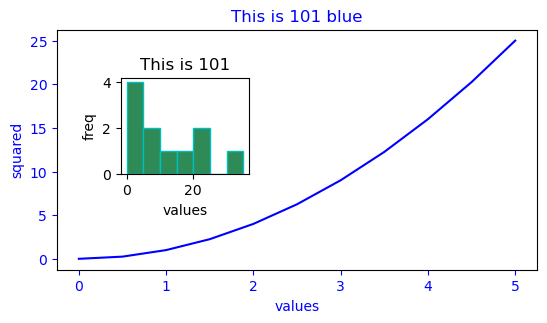

In [8]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.75, 0.5]) 
axes2 = fig.add_axes([0.2, 0.3, 0.2, 0.2])

axes1.plot(x, y, 'b')
axes1.set_xlabel(xlab)
axes1.set_ylabel(ylab)
axes1.set_title(f'{mytitle} blue', color='b')

axes2.hist(x+y, bins=range(0,40,5), color='seagreen', edgecolor = "c")

axes2.set_xlabel(xlab)
axes2.set_ylabel('freq')
axes2.set_title(mytitle)

axes1.xaxis.label.set_color('b')
axes1.yaxis.label.set_color('b')
axes1.tick_params(axis='both', colors='b')

#### 1.2.3. Use _plt.subplots()_

The method plt.subplots() instantiates a list of two objects, _figure_ and _axes_, at once.  The layout is defined by parameters _nrows_ and _ncols_. By default, it will have one single _axes_ or plot.

This is essentially same as previous one, but the layout is automatically defined.

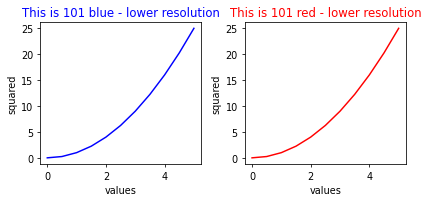

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3), dpi=70) 
for i, ax in enumerate(axes):
    if i == 0:
        mycolor = 'blue'
    else:
        mycolor = 'red'
    ax.plot(x, y, mycolor)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(f'{mytitle} {mycolor} - lower resolution', color=mycolor)
  
fig.tight_layout() # avoid overlap; plt.tight_layout() also works.

We can pre-define the axes names. This allows us to define plots in a loop as above or individually.

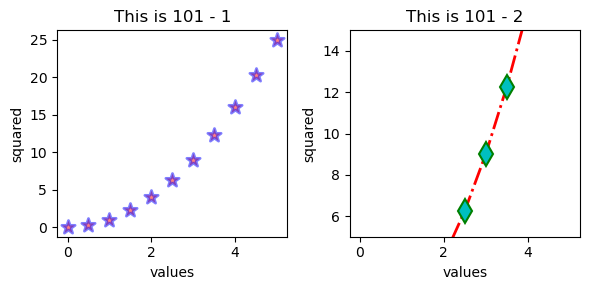

In [10]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(6,3), dpi=100)

ax1.scatter(x, y, color='r', marker='*', s=100, edgecolors='b', alpha=0.5, linewidth=2)
ax1.set_xlabel(xlab)
ax1.set_ylabel(ylab)
ax1.set_title(f'{mytitle} - 1')

ax2.plot(x, y, color='r', linewidth=2, linestyle='-.', marker='d', markersize=12, 
         markerfacecolor='c', markeredgewidth=1.5, markeredgecolor="g" )
ax2.set_xlabel(xlab)
ax2.set_ylabel(ylab)
ax2.set_ylim([5,15])
ax2.set_title(f'{mytitle} - 2')

fig.tight_layout()

In [11]:
##for output without code
#from IPython.core.display import HTML
#HTML('<style>.input, .jp-InputArea {display: none !important}</style>')